# INTRODUCTION
**Author: Antoine Dumont Neira**

**Last Update: July 2024**

This is an example notebook with the basic setup required to run my wiggle corrector code for NIRSpec data. So far this code work for the 170lp and 290lp filters

1. The model for the wiggles consist of multiple sinudoidal fits of the form f(x) = $A\times \cos(2 \pi f_{\omega} + \phi)$ at chunks of wavelenghts of $\sim 0.1 \mu m$. This part is done in the same manner as described in the code of M. Perna presented in https://ui.adsabs.harvard.edu/abs/2023A%26A...679A..89P/abstract and available in the Github: https://github.com/micheleperna/JWST-NIRSpec_wiggles?tab=readme-ov-file.

2. The code presented here should be regarded as an upgraded version of that code, with the main differences between the two listed below:
    >2.1. The reference spectrum, or in other words, the model of how the spectrum would look without wiggles in the Perna code was made of only an annular spectrum. In this code is a mixture of an **annular spectrum + an enlarged anular spectrum**$ ^{*}$ **+ Power-Law + 2nd degree polynomial**. This ensures that we can model corretly for changing on the slope of the continuum and equivalent width of stellar/gas features between the model and the data. 
    
    >2.2. The sinusoidal model is (x) = $A\times \cos(2 \pi f_{\omega} + \phi)$ plus a constant, same than at the code of M. Perna. This model is only used for obtaining the Amplitud, Frequency and phase of the cosine function while allowing to also model mismatches between the spectrum and the model described in point 2.1. However, the final model that is subtracted from the data does not include this continuum parameter, this prevents changing the shape of the continuum, a problem that I encountered with the code of M. Perna.

    >2.3 How we identify the pixels affected by wiggles. While the data that M. Perna analized in  https://ui.adsabs.harvard.edu/abs/2023A%26A...679A..89P/abstract was a bright Quasar, and the wiggles are produced from an undersampling of the PSF for point sources, a simple Signal-to-Noise cut was done to trace "Quasar" light and then pixels with wiggles. We can imagine that this does not holds up for all point sources, specially where the point source is not dominant, for example the case of a Low-luminosity AGN. 
    Therefore, **this code flaggs pixels affected by wiggles based on their Fourier Transform**. The frequewncy of wiggles is fairly stable for different type of data, presenting large peaks on frequncies of 5-50 $[1/\mu m]$. In this code I compare the Fourier transform of the annular spectrum ( that traces frequencies associated with real physical process) with the rest of the spectrum, and compare the ratio of the amplitud of the FFT spectrum in the 5-50 $[1/\mu m]$ range. Normally, pixels with a ratio of 3-sigma enhancement are flagged as affected heavily by wiggles, however the user can set the threshold by hand. 

    >2.4 Another change worth mentioning is that the code is written on a Python class and not just as a jupyter notebook, this makes the user experience much simpler and also the codes is written fully parallelized, reducing the time for running significantly!.


## **STEP 0**: SETUP BASIC PARAMETERS

Setup basic information, such as redshift, jwst filter, path to rhe datacube, etc

In [1]:
run Main.py

In [2]:
pathcube_input= "/Users/dumont/Documents/ReveaLLGN/DATA/TWA-28/MAST_2024-07-24T2034/JWST/jw01270-o004_t003_nirspec_g235h-f170lp/"
cube_input  = "jw01270-o004_t003_nirspec_g235h-f170lp_s3d.fits"
sourcename = "TWA-28"
z = 0.0
jwst_filter = 'f170lp' ### Or f290lp 

fit_wiggles_170lp = setup(Object_name=sourcename,
                                    pathcube=pathcube_input,cube_path=cube_input,
                                    redshift=z,jwst_filter=jwst_filter)


### Find the center of the datacube

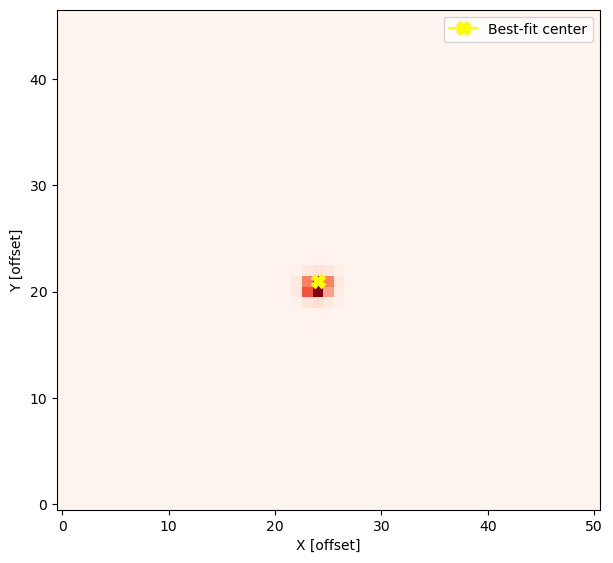


 Center is  x, y =  24 21


In [3]:
fit_wiggles_170lp.get_center(do_plots=True)

#### **MASK BAD REGIONS** 
The code performs automated emission line detection. The user can define the minimum S/N and width (in pixels) to flag an emission line. Additionally, the user can also provide a file named "linefeatures_vac.dat" that contains known emission and absorption lines, such as CO bandhead, etc.

The continuum window, as its name suggests, is used to calculate the continuum in the cosine function described in section 2.2. Please avoid large emission lines, etc. The gap between the two chips is automatically masked.

Here is a quick example of the parameters you can define to get a better fit:

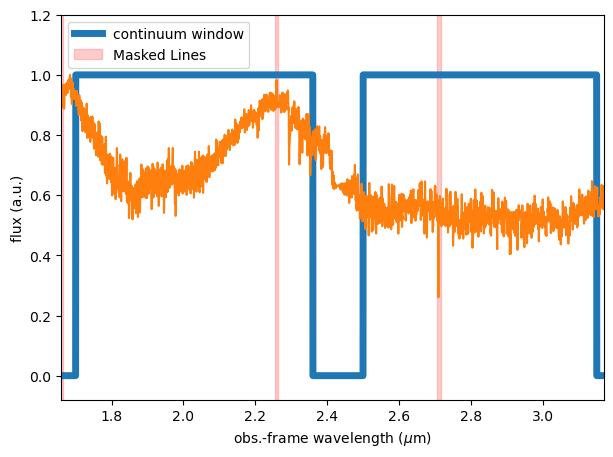

In [4]:

fit_wiggles_170lp.get_reference_spectrum(in_radius=4,out_radius=10,do_plots=True)

# **STEP 2:** FIT WIGGLES FOR CENTRAL PIXEL

Here I perform the fitting only on the central pixel. This model will be used later as prior for the Frequewncy, amplitud and continuum for the sinusoidal fiting for the rest of the pixels in the datacube. 

**IMPORTANT!!** Please based on this plot choose a side of the chip that the wiggles are more prevalent. In my experience in the f170lp filter the right chip wiggles are more clear and the opposite for the f290lp. 

based on your choice set **chip_side** either to **"right"** or **"left"**. Default I set it up to the convention I mentioned above. 

Fitting routine requires 3 iterationes to achieve a good result. 

iteration n.  0
ITERATION 0 OF 2 FINISHED
iteration n.  1
ITERATION 1 OF 2 FINISHED
error message =  ERROR: number of parameters must not exceed data


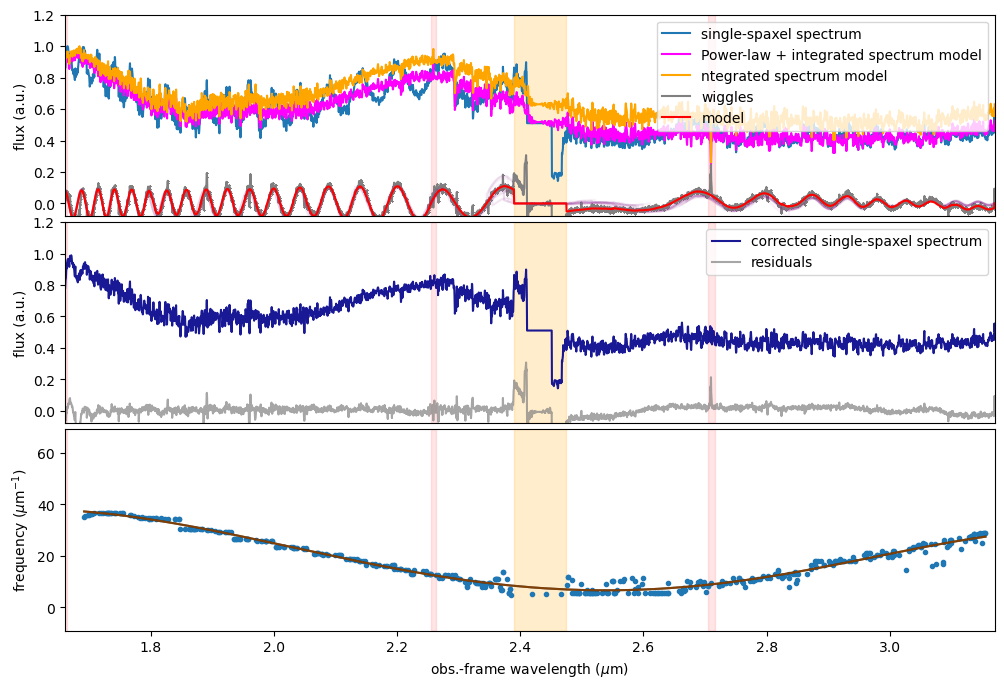

In [5]:

fit_wiggles_170lp.FitWigglesCentralPixel(N_rep=15) 


# **STEP 2:** IDENTIFY PIXELS WITH WIGGLES


By default, the code only searches for wiggles within a circle of radius 12 pixels around the center of the cube. Since wiggles are associated with the central point source, they are not expected to be found at much larger radii.

WARNING BAD PIXEL. PIXEL 10 10 SKIPPED!
WARNING BAD PIXEL. PIXEL 10 11 SKIPPED!
WARNING BAD PIXEL. PIXEL 11 10 SKIPPED!
WARNING BAD PIXEL. PIXEL 11 13 SKIPPED!
WARNING BAD PIXEL. PIXEL 30 39 SKIPPED!
WARNING BAD PIXEL. PIXEL 31 38 SKIPPED!
WARNING BAD PIXEL. PIXEL 31 39 SKIPPED!
WARNING BAD PIXEL. PIXEL 32 10 SKIPPED!
WARNING BAD PIXEL. PIXEL 32 39 SKIPPED!
WARNING BAD PIXEL. PIXEL 33 10 SKIPPED!
WARNING BAD PIXEL. PIXEL 33 38 SKIPPED!
WARNING BAD PIXEL. PIXEL 33 39 SKIPPED!
WARNING BAD PIXEL. PIXEL 34 10 SKIPPED!
WARNING BAD PIXEL. PIXEL 34 11 SKIPPED!
WARNING BAD PIXEL. PIXEL 34 38 SKIPPED!
WARNING BAD PIXEL. PIXEL 34 39 SKIPPED!
WARNING BAD PIXEL. PIXEL 35 23 SKIPPED!
WARNING BAD PIXEL. PIXEL 35 26 SKIPPED!
WARNING BAD PIXEL. PIXEL 35 38 SKIPPED!
WARNING BAD PIXEL. PIXEL 35 39 SKIPPED!
WARNING BAD PIXEL. PIXEL 36 25 SKIPPED!
WARNING BAD PIXEL. PIXEL 36 26 SKIPPED!
WARNING BAD PIXEL. PIXEL 36 27 SKIPPED!


/Users/dumont/Documents/ReveaLLGN/MODEL/FittWiggles/FINAL WIGGLE MODEL/Github/FIndWiggles.py:163: RuntimeWarning: All-NaN slice encountered
  spec = np.nan_to_num( cube[:,y,x], nan= np.nanmedian(cube[:,y,x][self.con_windows]))
/Users/dumont/Documents/ReveaLLGN/MODEL/FittWiggles/FINAL WIGGLE MODEL/Github/FIndWiggles.py:164: RuntimeWarning: All-NaN slice encountered
  espec =  np.nan_to_num( ecube[:,y,x] , nan= np.nanmedian(ecube[:,y,x][self.con_windows]) )


WARNING BAD PIXEL. PIXEL 37 10 SKIPPED!
WARNING BAD PIXEL. PIXEL 37 21 SKIPPED!
WARNING BAD PIXEL. PIXEL 37 22 SKIPPED!
WARNING BAD PIXEL. PIXEL 37 23 SKIPPED!
WARNING BAD PIXEL. PIXEL 37 25 SKIPPED!
WARNING BAD PIXEL. PIXEL 37 26 SKIPPED!
WARNING BAD PIXEL. PIXEL 37 27 SKIPPED!


/Users/dumont/Documents/ReveaLLGN/MODEL/FittWiggles/FINAL WIGGLE MODEL/Github/FIndWiggles.py:163: RuntimeWarning: All-NaN slice encountered
  spec = np.nan_to_num( cube[:,y,x], nan= np.nanmedian(cube[:,y,x][self.con_windows]))
/Users/dumont/Documents/ReveaLLGN/MODEL/FittWiggles/FINAL WIGGLE MODEL/Github/FIndWiggles.py:164: RuntimeWarning: All-NaN slice encountered
  espec =  np.nan_to_num( ecube[:,y,x] , nan= np.nanmedian(ecube[:,y,x][self.con_windows]) )


WARNING BAD PIXEL. PIXEL 38 10 SKIPPED!
WARNING BAD PIXEL. PIXEL 38 11 SKIPPED!
WARNING BAD PIXEL. PIXEL 38 12 SKIPPED!
WARNING BAD PIXEL. PIXEL 38 13 SKIPPED!
WARNING BAD PIXEL. PIXEL 38 21 SKIPPED!
WARNING BAD PIXEL. PIXEL 38 22 SKIPPED!
WARNING BAD PIXEL. PIXEL 38 23 SKIPPED!
WARNING BAD PIXEL. PIXEL 38 24 SKIPPED!
WARNING BAD PIXEL. PIXEL 38 25 SKIPPED!
WARNING BAD PIXEL. PIXEL 38 26 SKIPPED!
WARNING BAD PIXEL. PIXEL 38 27 SKIPPED!
WARNING BAD PIXEL. PIXEL 38 39 SKIPPED!
WARNING BAD PIXEL. PIXEL 39 10 SKIPPED!
WARNING BAD PIXEL. PIXEL 39 11 SKIPPED!
WARNING BAD PIXEL. PIXEL 39 12 SKIPPED!
WARNING BAD PIXEL. PIXEL 39 13 SKIPPED!
WARNING BAD PIXEL. PIXEL 39 14 SKIPPED!
WARNING BAD PIXEL. PIXEL 39 15 SKIPPED!
WARNING BAD PIXEL. PIXEL 39 16 SKIPPED!
WARNING BAD PIXEL. PIXEL 39 21 SKIPPED!
WARNING BAD PIXEL. PIXEL 39 22 SKIPPED!
WARNING BAD PIXEL. PIXEL 39 23 SKIPPED!
WARNING BAD PIXEL. PIXEL 39 24 SKIPPED!
WARNING BAD PIXEL. PIXEL 39 25 SKIPPED!
WARNING BAD PIXEL. PIXEL 39 26 SKIPPED!


/Users/dumont/Documents/ReveaLLGN/MODEL/FittWiggles/FINAL WIGGLE MODEL/Github/FIndWiggles.py:163: RuntimeWarning: All-NaN slice encountered
  spec = np.nan_to_num( cube[:,y,x], nan= np.nanmedian(cube[:,y,x][self.con_windows]))
/Users/dumont/Documents/ReveaLLGN/MODEL/FittWiggles/FINAL WIGGLE MODEL/Github/FIndWiggles.py:164: RuntimeWarning: All-NaN slice encountered
  espec =  np.nan_to_num( ecube[:,y,x] , nan= np.nanmedian(ecube[:,y,x][self.con_windows]) )


getting best-fit model for task 0 of 842
getting best-fit model for task 1 of 842
getting best-fit model for task 2 of 842
getting best-fit model for task 3 of 842
getting best-fit model for task 4 of 842
getting best-fit model for task 5 of 842
getting best-fit model for task 6 of 842
getting best-fit model for task 7 of 842
getting best-fit model for task 8 of 842
getting best-fit model for task 9 of 842
getting best-fit model for task 10 of 842
getting best-fit model for task 11 of 842
getting best-fit model for task 12 of 842
getting best-fit model for task 13 of 842
getting best-fit model for task 14 of 842
getting best-fit model for task 15 of 842
getting best-fit model for task 16 of 842
getting best-fit model for task 17 of 842
getting best-fit model for task 18 of 842
getting best-fit model for task 19 of 842
getting best-fit model for task 20 of 842
getting best-fit model for task 21 of 842
getting best-fit model for task 22 of 842
getting best-fit model for task 23 of 842
ge

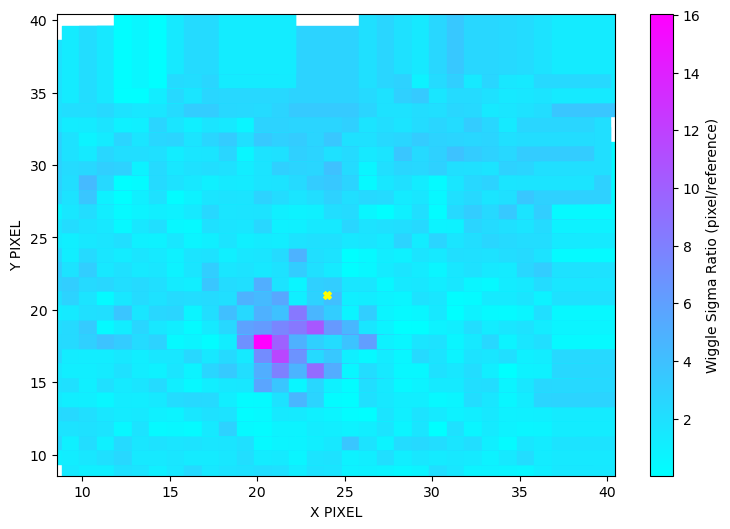

In [7]:
from FIndWiggles import fit_wiggly_spaxels, get_wiggly_pixels
chip_side = "right"

results = get_wiggly_pixels(fit_wiggles_170lp, N_Cores=7,chip_side=chip_side,do_plots=True)



### **Examine the FFT to define threshold**

This step is not mandatory, here I make it as an example of how the user can study the data to determine an apropied sigma "threshold" above which pixels are flagg as having wiggles.
 
 Using **plot_wiggle_FFT** you can visualize the FFT used to calculate the wiggle ratio. This can be useful to vizualize a pixel that you may not be sure if should or not be corrected for wiggles. Based on the ratio of this pixel you can then define a "Threshold".

 The default "threshold" is 3. 

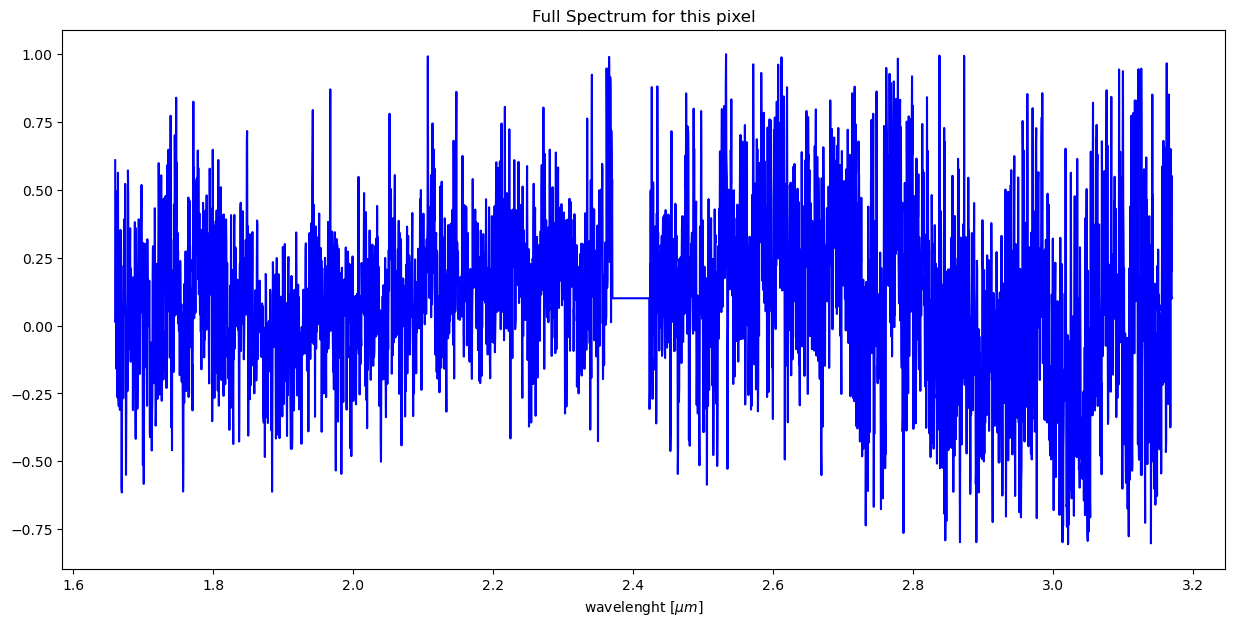


 Sigma Ratio = 4.370


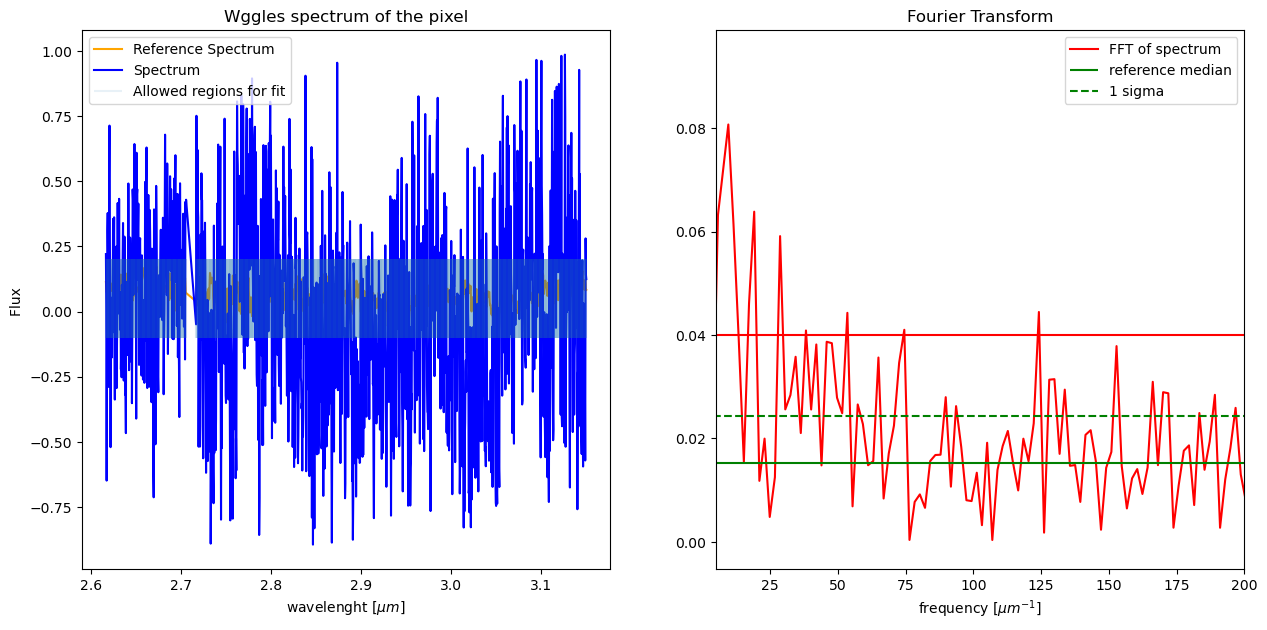

In [15]:
from FIndWiggles import plot_wiggle_FFT
X, Y = 12,31
plot_wiggle_FFT(fit_wiggles_170lp,X, Y,chip_side)

#### Here based on examining outer pixels I have decided on a threshold of 4.5


 29 PIXELS AFFECTED BY WIGGLES


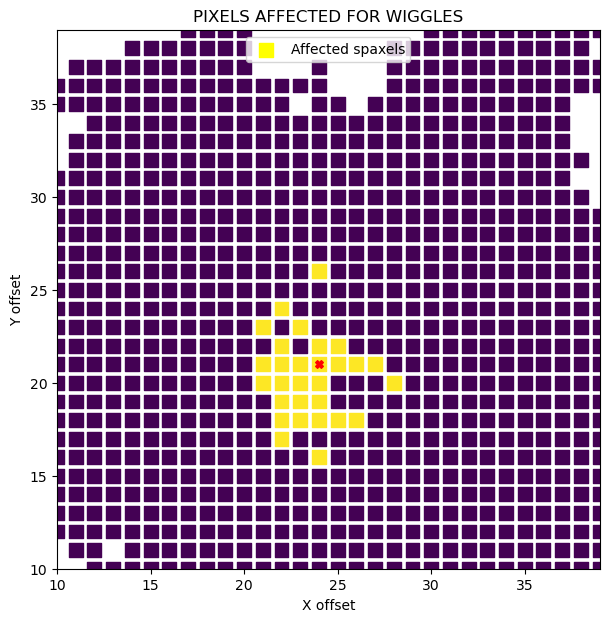

In [17]:
from FIndWiggles import define_affected_pixels
affected_pixels = define_affected_pixels(fit_wiggles_170lp,results,threshold=4.5)


If needed for later use you can save the list of flagged pixels by setting the arg **save_file=True**

Later you can load the file with the list of affected pixels as follow:

> import pandas as pd

> affected_pixels = pd.read_csv("affected_pixels.csv",header=None)

> affected_pixels = [[i,j] for (i,j) in zip(affected_pixels[0],affected_pixels[1])]

## **STEP 3:** CORRECT WIGGLES
Now that we have identified spaxels affected by wiggles, we need to obtain a model of their frequency.
For this we start by creating an informed guess of the frequency of the wiggles based on the central pixel, as it is the spaxel more affected by them.

This model of frequencies and amplitudes (for the cosine function) will be then used as a prior
for fitting the frequency and amplitude for the rest of affected pixels. 

Adding affected spaxels to multiprocessing.pool 


 ##### START WIGGLE CORRECTION ##### 

Correcting wiggles on task: 0 of 29
error message =  ERROR: number of parameters must not exceed data
error message =  ERROR: number of parameters must not exceed data
error message =  ERROR: number of parameters must not exceed data
Correcting wiggles on task: 1 of 29
Correcting wiggles on task: 2 of 29
Correcting wiggles on task: 3 of 29
Correcting wiggles on task: 4 of 29
Correcting wiggles on task: 5 of 29
Correcting wiggles on task: 6 of 29
Correcting wiggles on task: 7 of 29
error message =  ERROR: number of parameters must not exceed data
error message =  ERROR: number of parameters must not exceed data
error message =  ERROR: number of parameters must not exceed data
error message =  ERROR: number of parameters must not exceed data
Correcting wiggles on task: 8 of 29
Correcting wiggles on task: 9 of 29
error message =  ERROR: number of parameters must not exceed data
Correcting wiggles on 

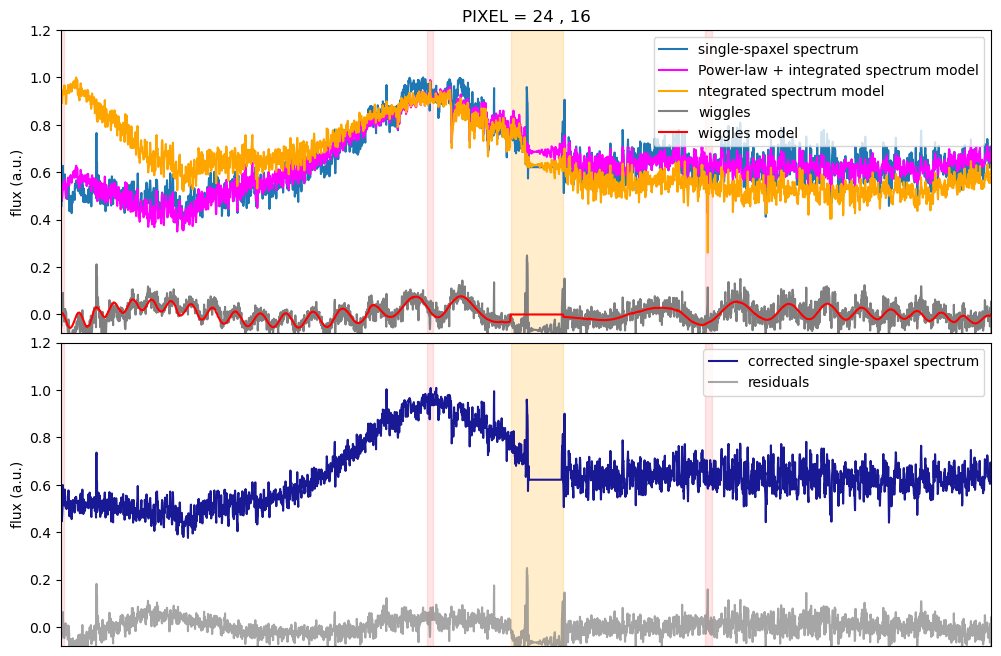

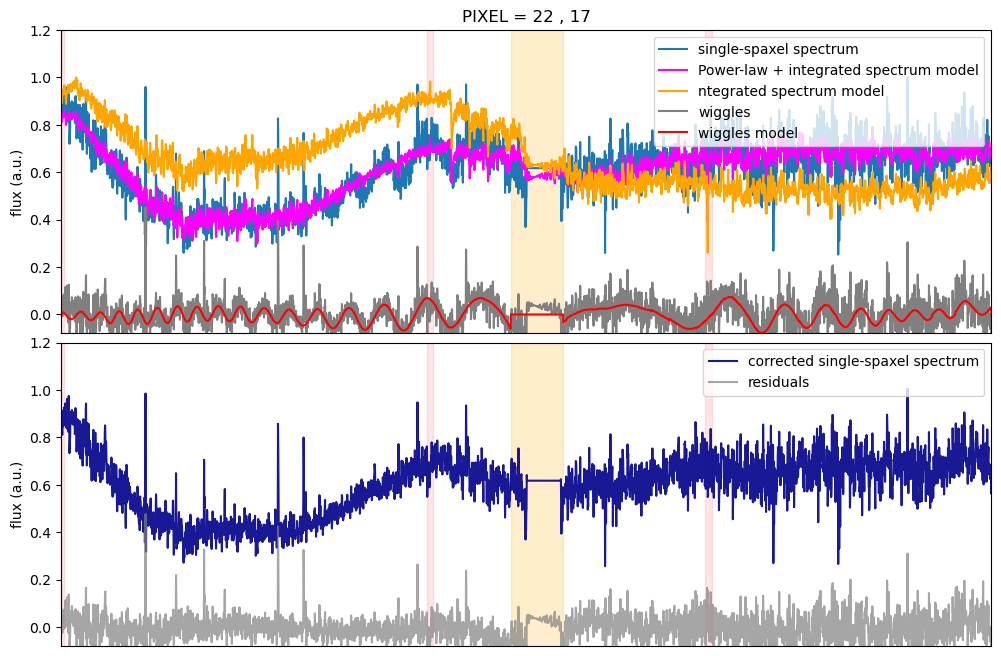

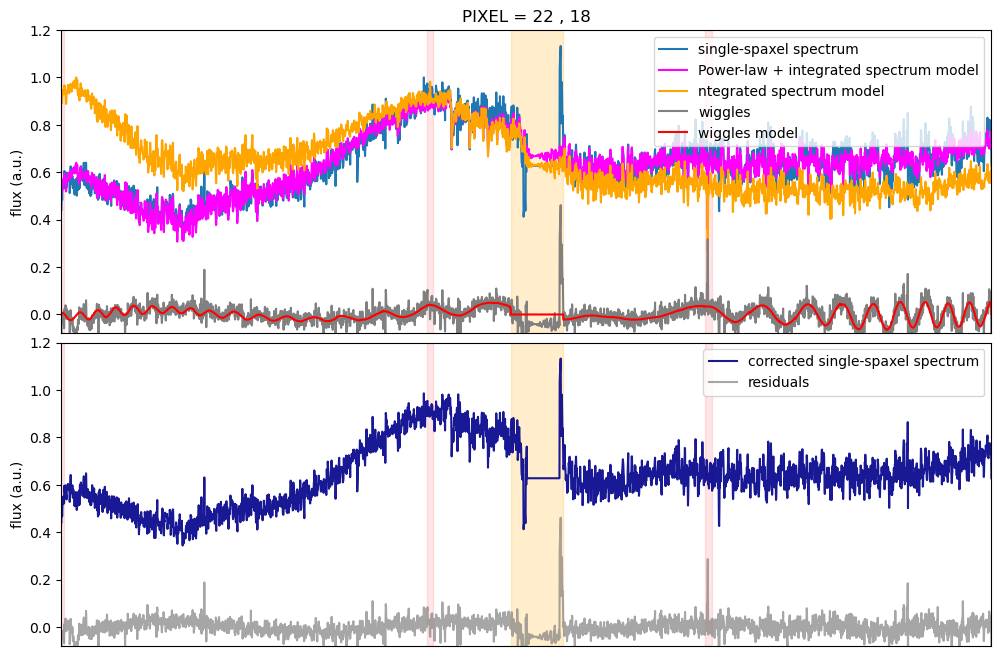

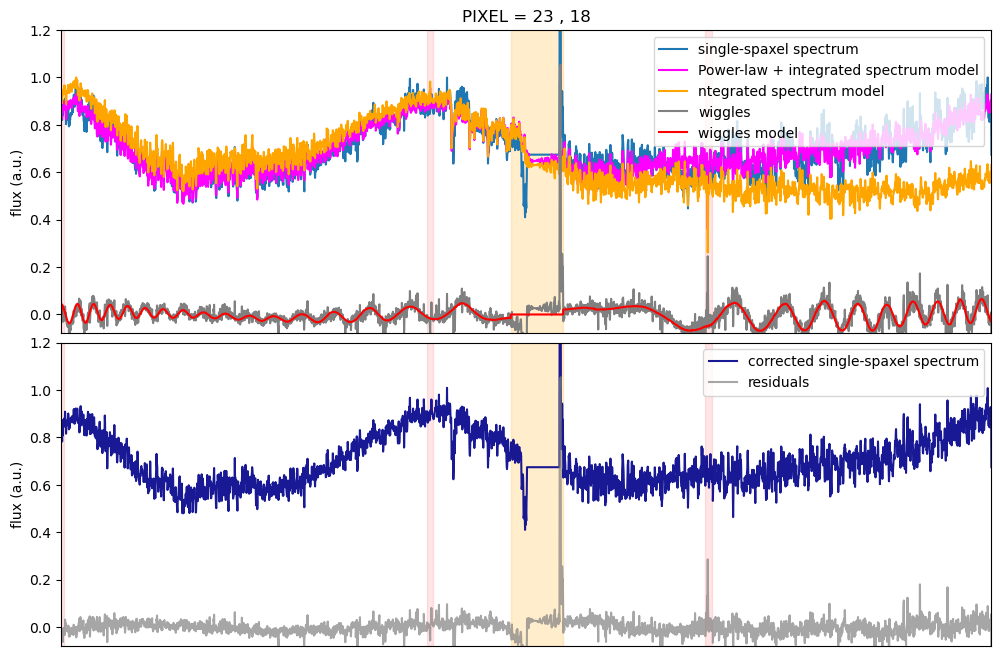

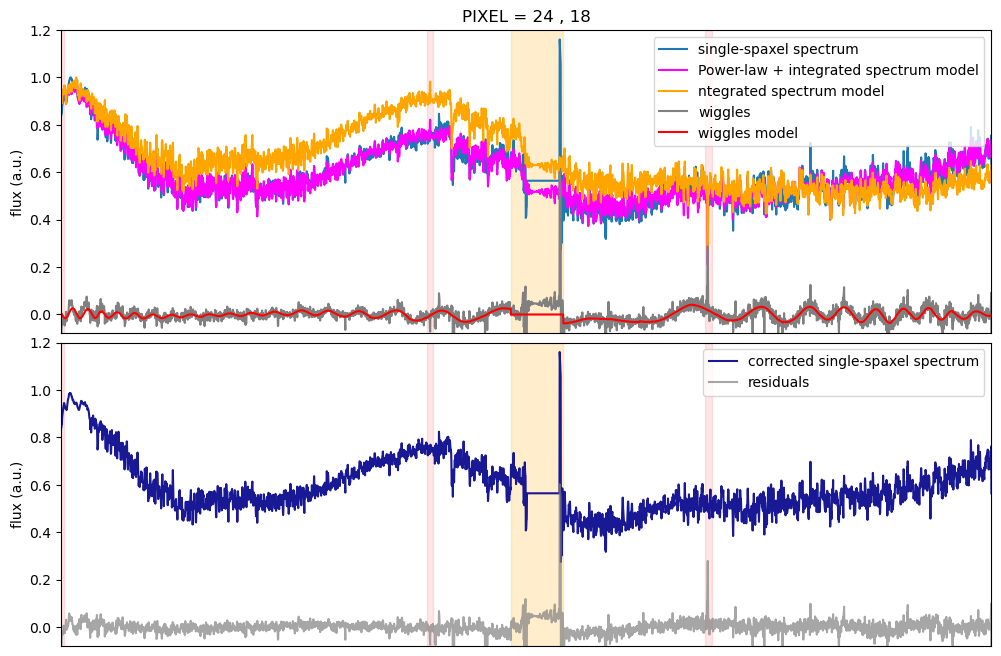

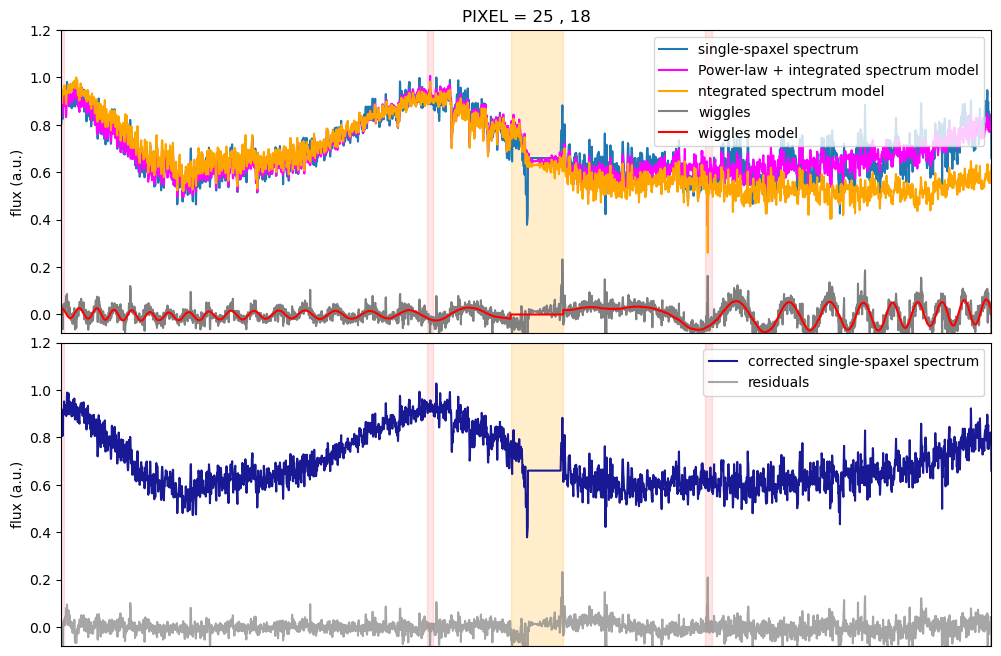

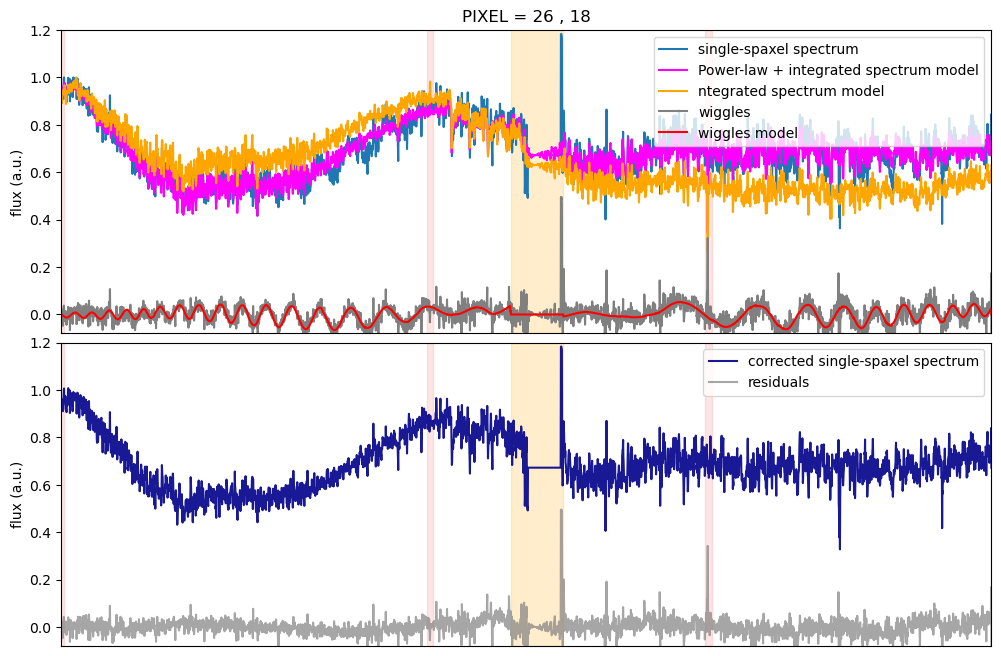

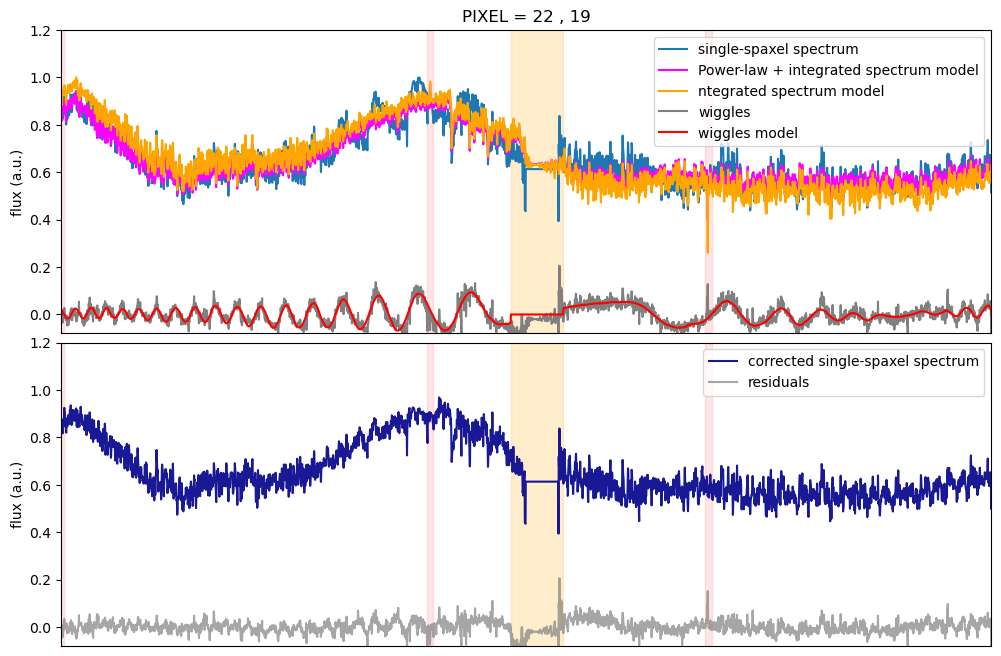

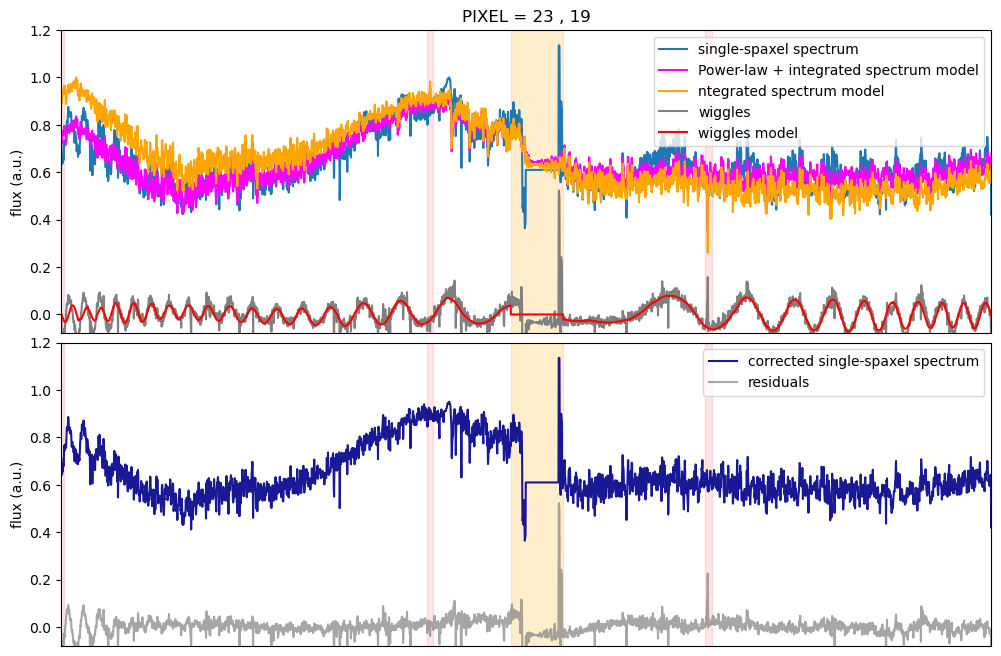

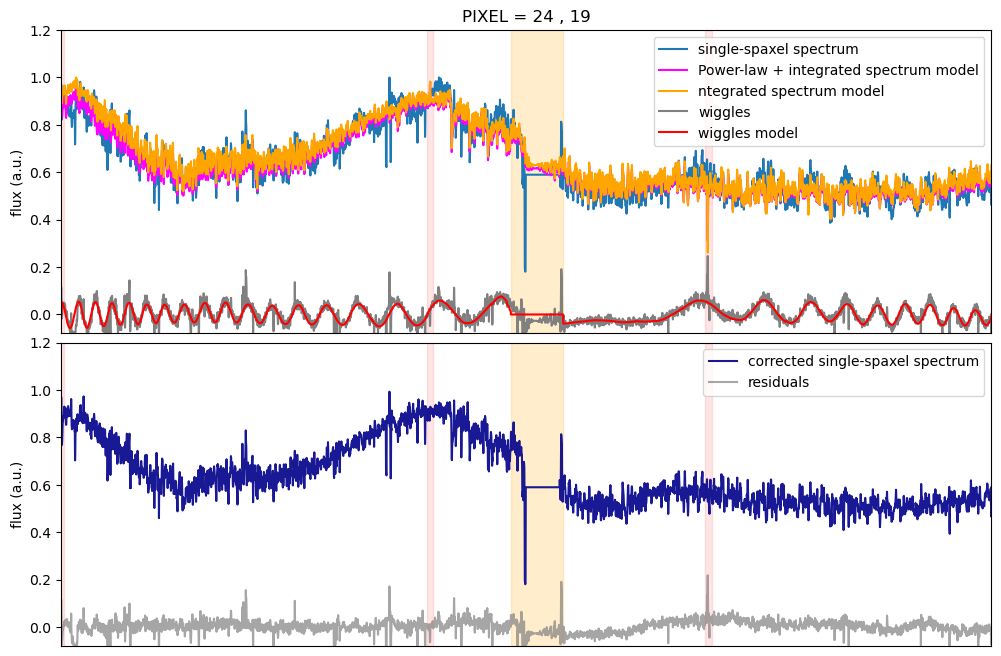

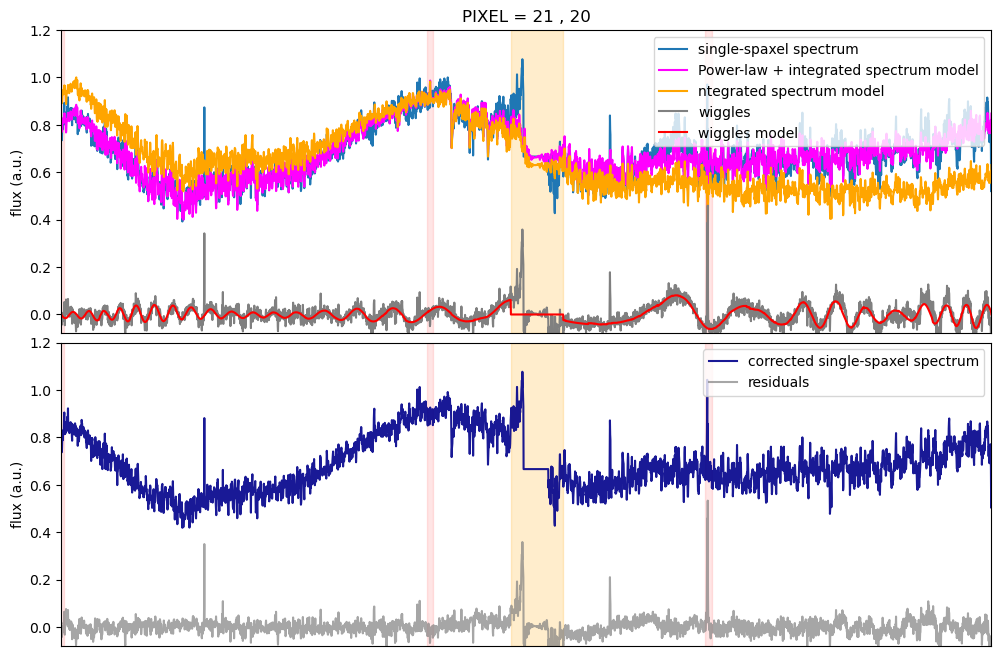

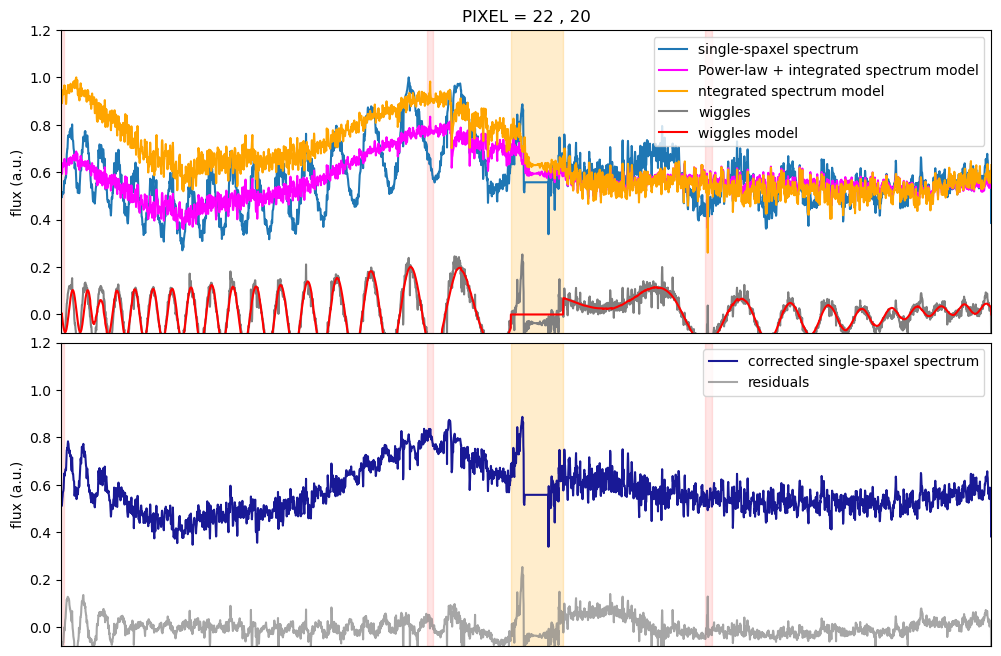

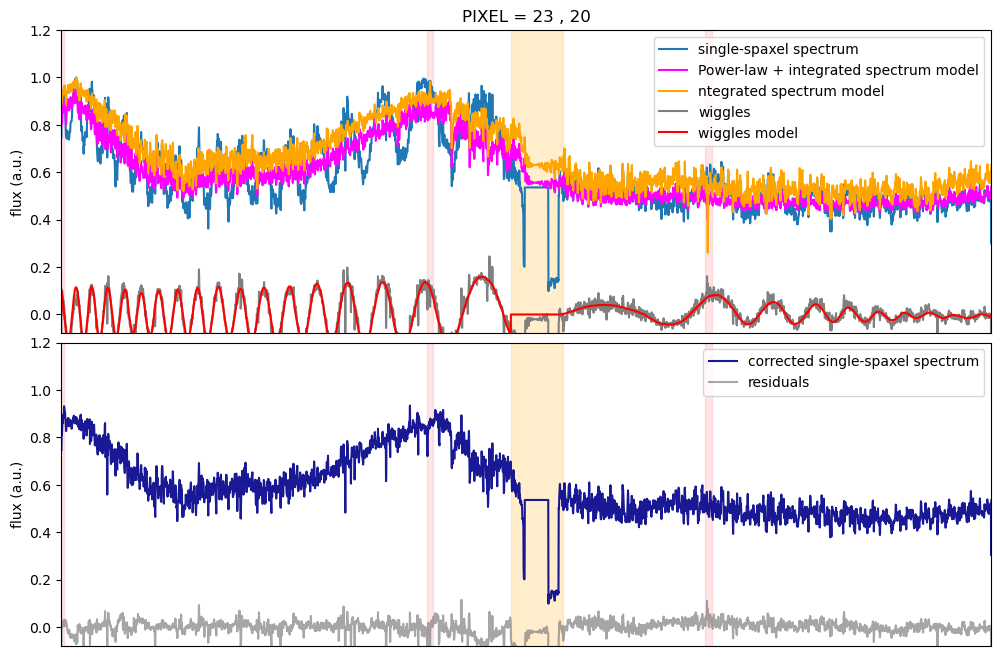

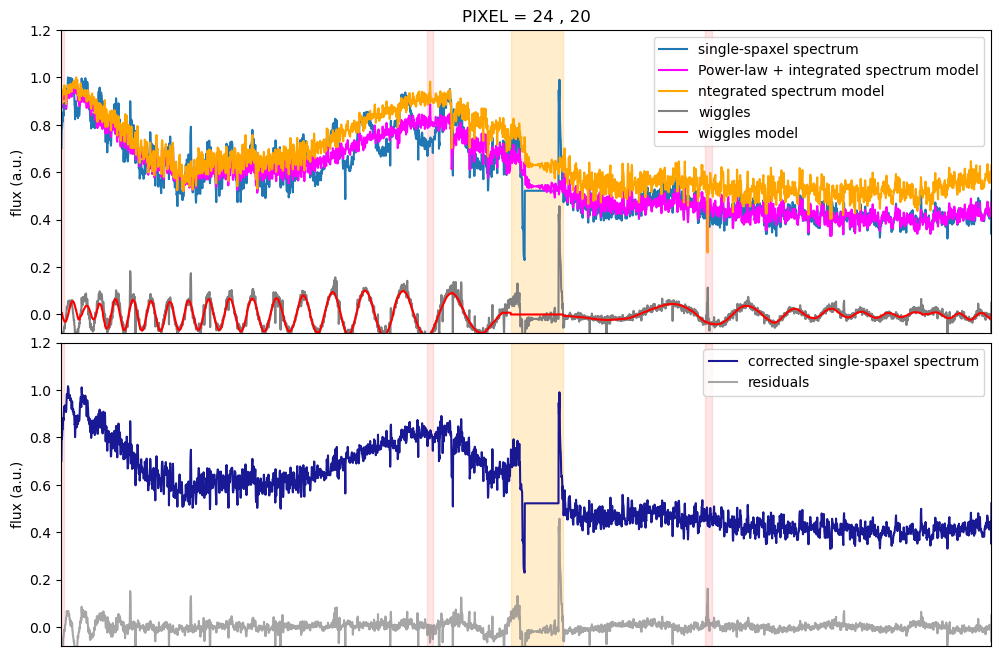

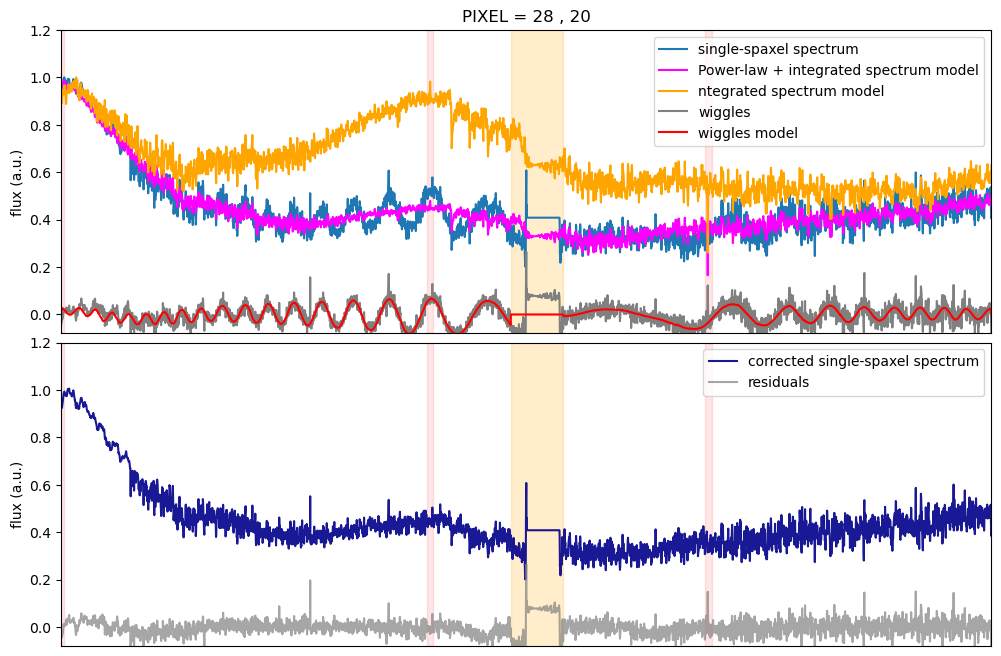

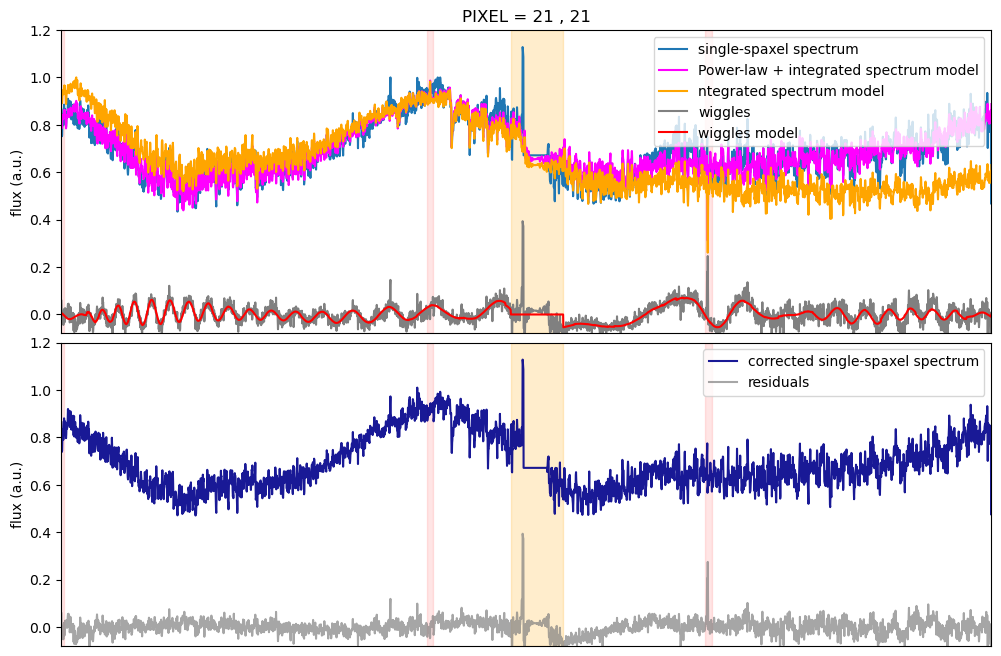

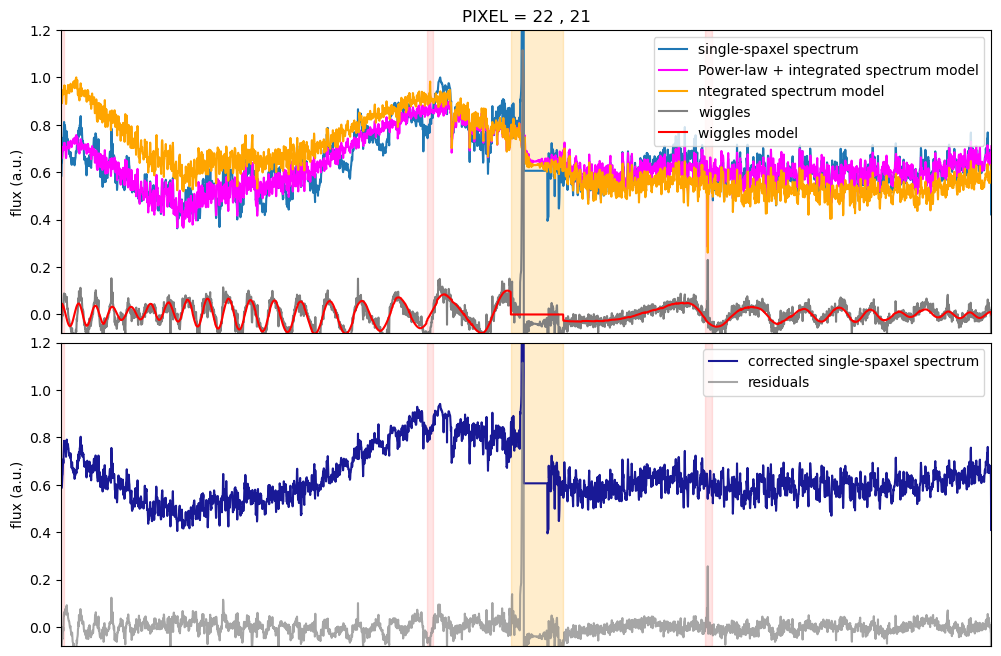

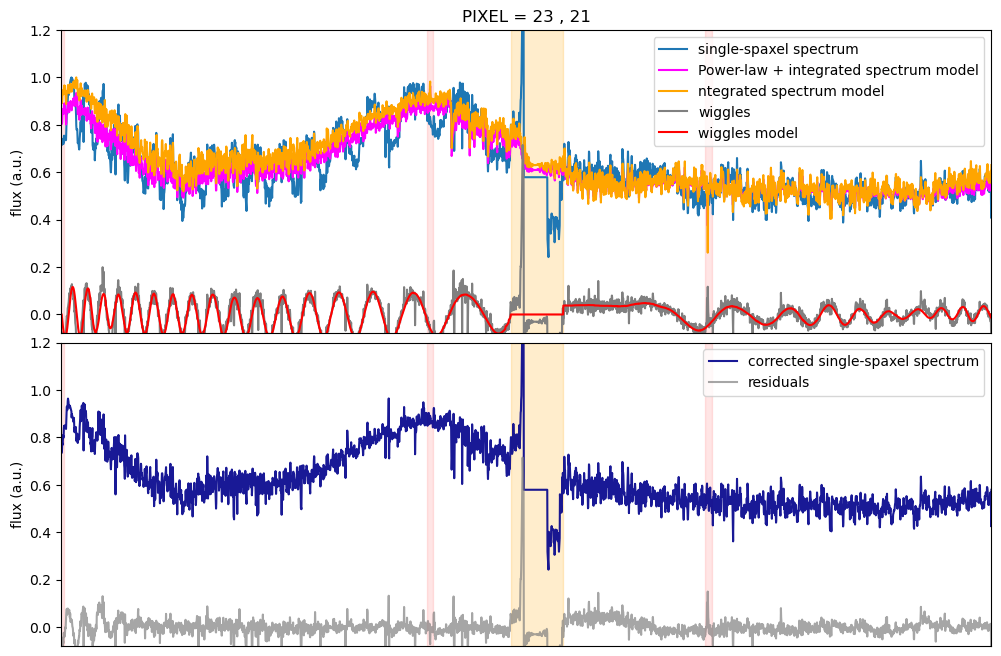

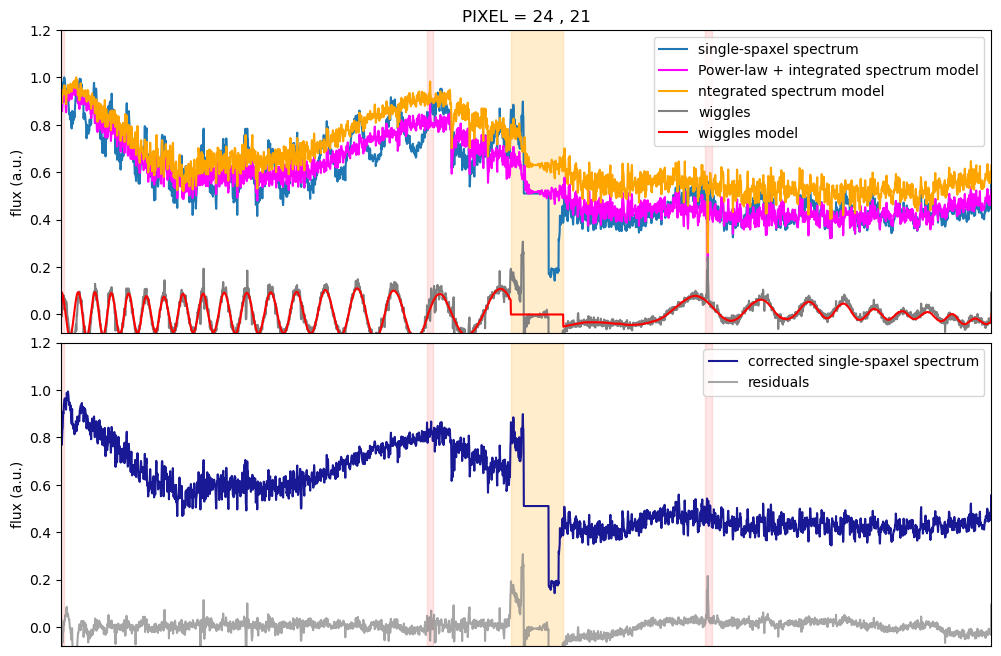

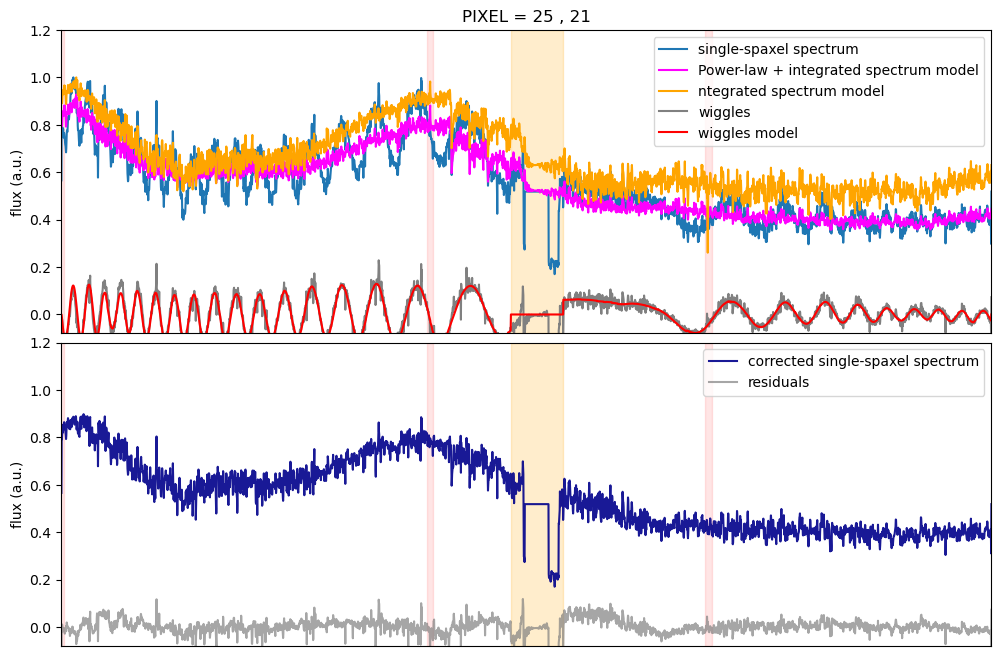

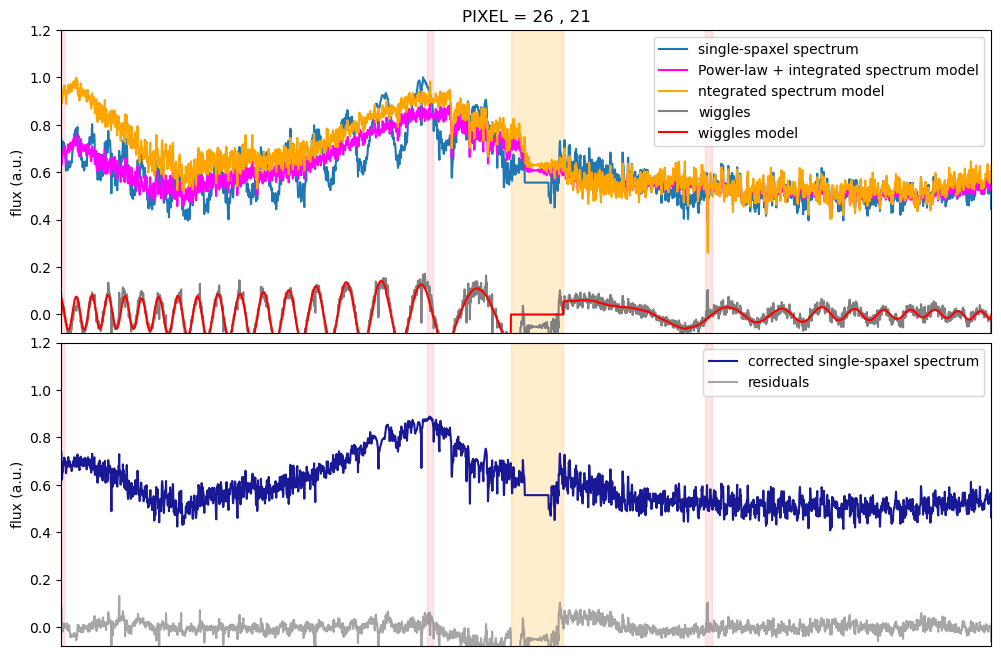

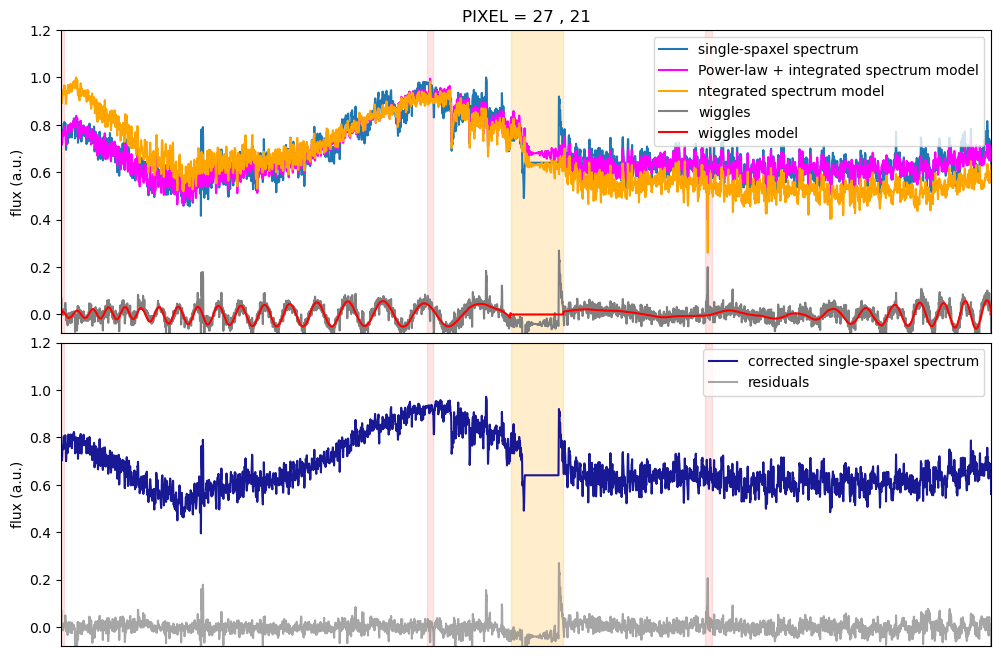

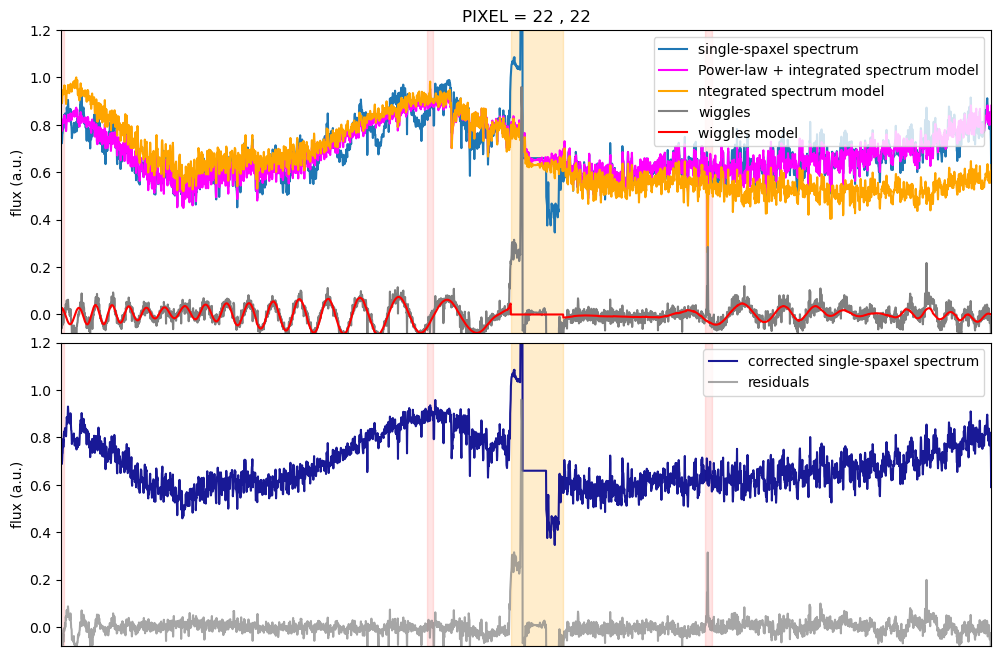

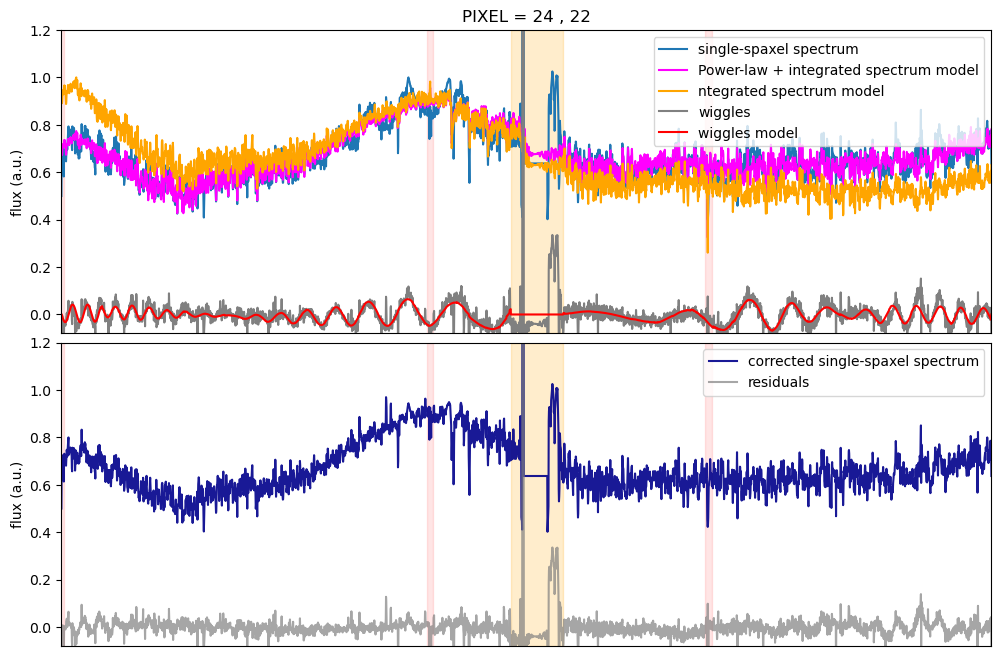

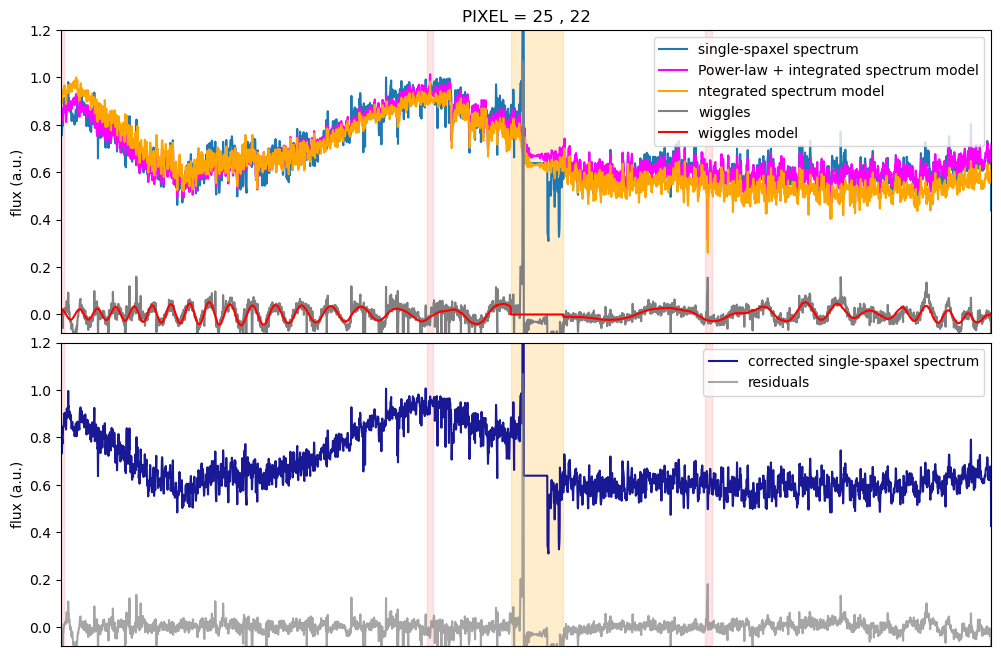

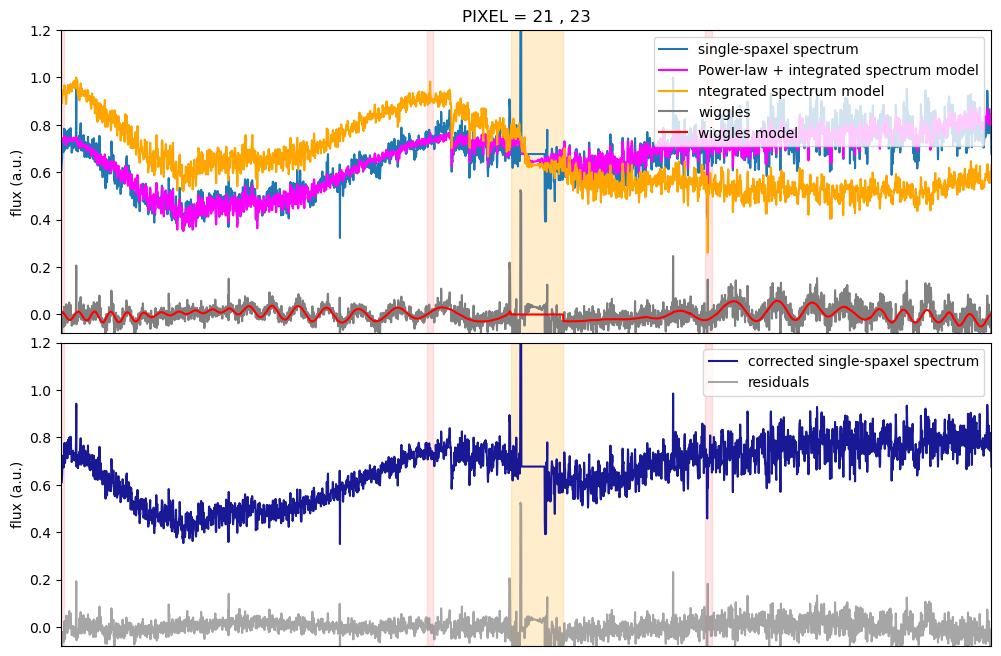

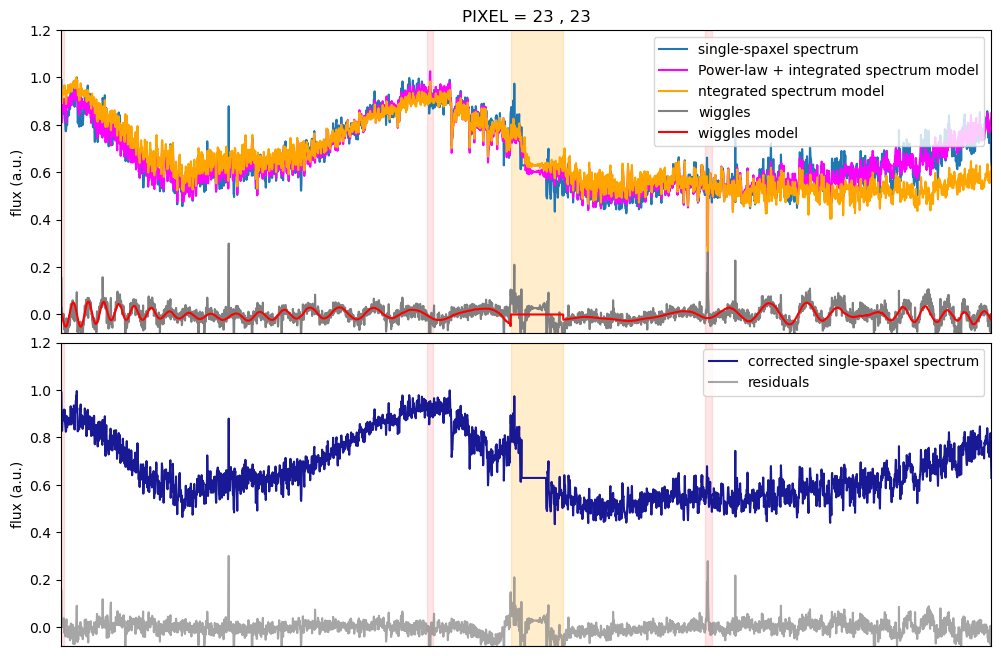

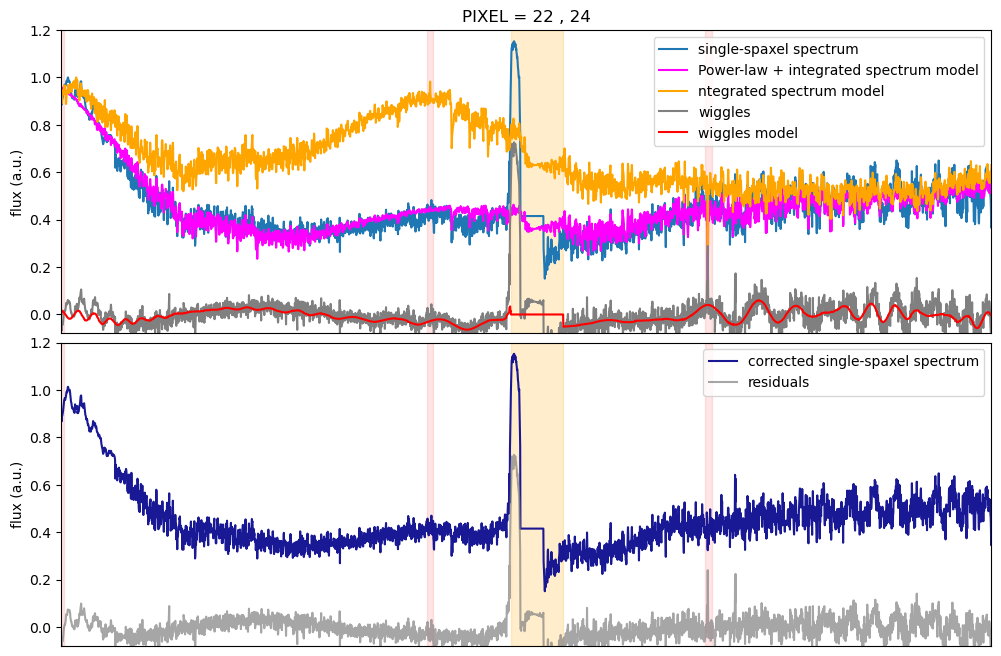

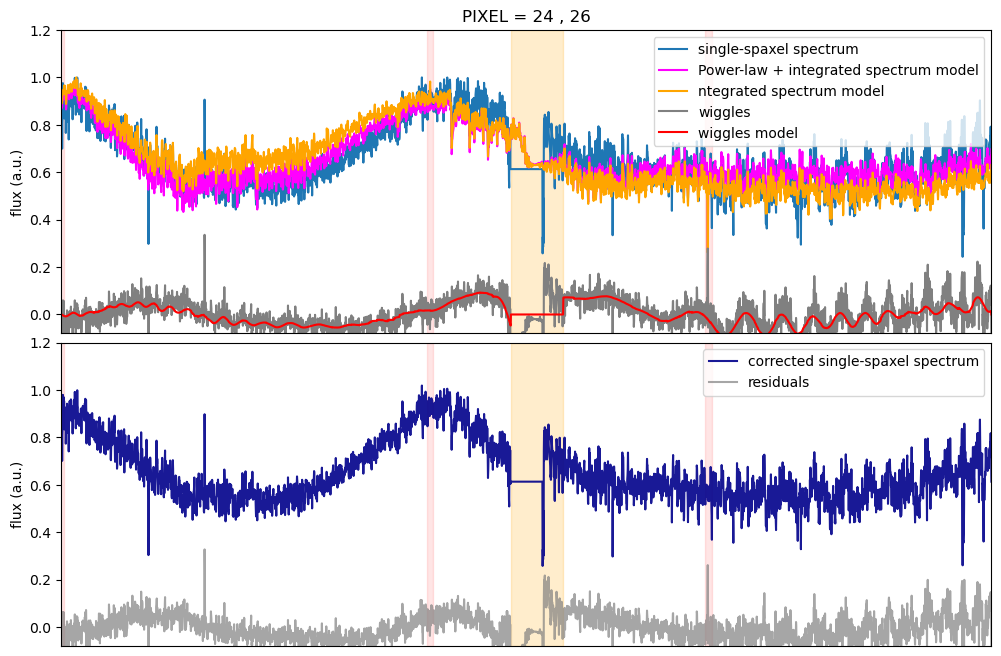

ADDING CORRECTED SPECTRA TO DATA CUBE 

DATA CUBE SAVED ON INPUT FOLDER, WITH NAME: /Users/dumont/Documents/ReveaLLGN/DATA/TWA-28/MAST_2024-07-24T2034/JWST/jw01270-o004_t003_nirspec_g235h-f170lp/jw01270-o004_t003_nirspec_g235h-f170lp_s3d_wigglycorrected.fits 


 FINISHED!


In [18]:
from FitWiggles import FitWiggles
FitWiggles(fit_wiggles_170lp,affected_pixels,N_rep=15,N_Cores=7,do_plots=True)